In [1]:
import numpy as np

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
# Train Set, Test Set의 분리
from sklearn.model_selection import train_test_split

train_input, test_input , train_target, test_target = \
    train_test_split(fish_length, fish_weight, random_state=42)

In [12]:
# 1차원 데이터를 2차원으로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

---
### 길이가 50cm인 생선의 무게를 예측

In [11]:
# ([[19.6],....]) 학습시킨 모델이 이런모양이라서 [[]]에 넣어줘야해
knr.predict([[50]])

array([1033.33333333])

> 예측값이 이상함

### 기존 데이터로 무게 확인

In [13]:
train_target.max()

1100.0

In [14]:
train_input.max()

44.0

### 산점도로 이웃을 구해서 확인해보자

In [15]:
import matplotlib.pyplot as plt

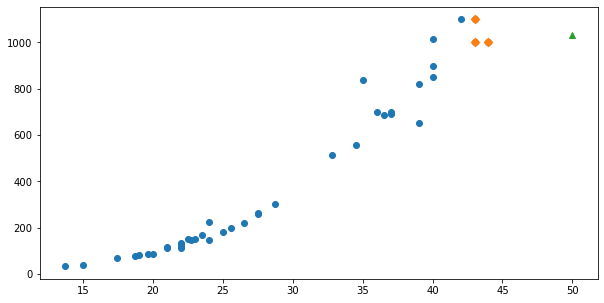

In [18]:
# 50cm 이웃 구하기
distence, indexs = knr.kneighbors([[50]])

# 훈련세트의 산점도 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃 샘플만 다시 그리기(50cm의 이웃)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')

#50cm 생선
plt.scatter(50, 1033, marker='^')

plt.show()

> 이렇게 완전이 떨어진값을 찾을땐 KNN을 쓸수 없다.

In [20]:
#못쓰는걸 확실하게 증명하자
knr.predict([[100]])

array([1033.33333333])

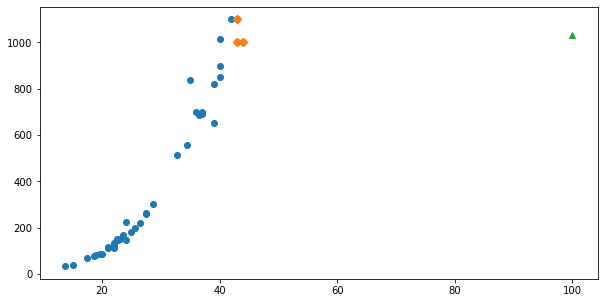

In [21]:
# 50cm 이웃 구하기
distence, indexs = knr.kneighbors([[100]])

# 훈련세트의 산점도 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃 샘플만 다시 그리기(50cm의 이웃)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')

#50cm 생선
plt.scatter(100, 1033, marker='^')

plt.show()

> 이래서 차트를 그려야함!

이럴때 사용하는게
---
# 선형회귀(Linear Regression)
: 직선이나 곡선의 함수식$(y = ax + b)$을 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(train_input, train_target)

LinearRegression()

In [26]:
lr.predict([[50]])

array([1241.83860323])

In [28]:
# y= ax + b 에서 기울기와 절편을 출력 (Deep Learning에서는 Weigth와 Bias로 불림)
# a(기울기,Weigth와), b(절편,Bias로)
# 맨끝에 _ 붙은것들은 함수에서 만든 변수
print("기울기 :",lr.coef_,"절편 :", lr.intercept_)

기울기 : [39.01714496] 절편 : -709.018644953547


In [31]:
39.01714496 * 50 + -709.018644953547

1241.8386030464533

# 산점도 그려보기

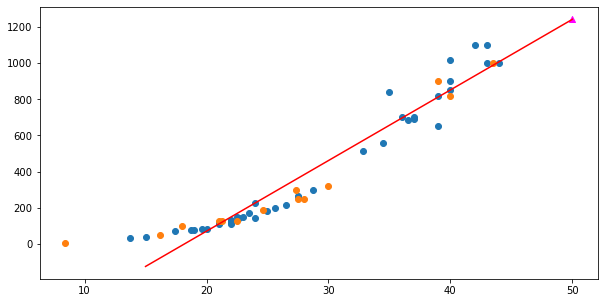

In [38]:
# 훈련세트의 산점도 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프를 그리기.
plt.plot(
    [15, 50],
    [15*lr.coef_+lr.intercept_,  50*lr.coef_+lr.intercept_],
    c ='red'
)

# 50cm 생선 데이터
plt.scatter(50, 1241.8, marker='^', color='magenta')



plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수가 발생할 수 있다.  
> 절편이 음수이다.  
> train data와 test data가 같이 움직이고 있는거 같아

In [37]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313562


> 과대적합이 발생했다  
> 단순회귀식은 이미 공식이 있어서 KNN처럼  Hyper Parameter값을 조절해줄수 없어서 다항회귀식으로 해보자!

---
# 다항회귀
$y=aX^2+bX+C$
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중회귀라고 한다.  
- 제곱은 곡선을 이루니까 제곱으로 특성공학으로 한거임!

In [41]:
# Feature를 제곱한 컬럼을 생성하여 기존의 컬럼에 붙인다.(column stack, row stack이 이떄 사용)
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [43]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [44]:
lr = LinearRegression()

In [45]:
lr.fit(train_poly, train_target)

LinearRegression()

In [48]:
# 50cm 생선 예측하기 (선형은 1241.8 이렇게 나왔어)
# 항이 두개니까 맞춰줘야함
lr.predict([[50**2, 50]])

array([1573.98423528])

In [49]:
# 기울기와 절편
# 항이 2개가 나옴, 절편이 마이너스 값이 안나옴(절편이 마이너스 나오면 신경쓰여) 
print("기울기 :",lr.coef_,"절편 :", lr.intercept_)

기울기 : [  1.01433211 -21.55792498] 절편 : 116.05021078278293


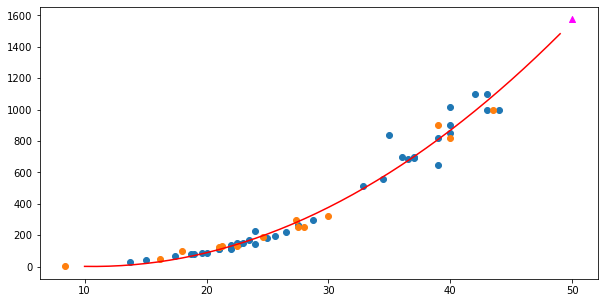

In [54]:
# 구간별 직선을 그리기위해 15에서 49까지의 정수열 만들기
# 곡선은 직선들의 합이니까 직선의 범위를 정의 한것?
point = np.arange(10,50)

# 훈련세트의 산점도 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프를 그리기.
plt.plot(
    point,
    1.01 * point**2 - 21.6*point + 116.5,
    c='red'
)

# 50cm 생선 데이터
plt.scatter(50, 1574.8, marker='^', color='magenta')



plt.show()

In [55]:
# 과대적합과 과소적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


> 0.007정도 과소적합이 발생하지만 단순회귀보다는 다항회귀가 진전이 있었다.  
> 0.5~0.3 이정도의 과소적합은 상관없다.